In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

/home/apandy/environemnts/tabular/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [50]:
res = pd.read_csv('res/Ollama_24_gwen3_4b_nothinking_code_values_v11_m1.csv')
#res = pd.read_csv('res/Ollama_26_gwen3_4b_nothink_naive_p1.csv')


In [51]:
# 2. Modell betöltése
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# 3. Embeddingek generálása
embeddings = model.encode(res['question'])


# 6. Adatok DataFrame-be
df = pd.DataFrame({
    'questions': res['question'],
    'em': res['em']
})

# 7. Embeddingek 2D-re csökkentése PCA-val vizualizációhoz
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)




In [52]:
em_points = reduced_embeddings[df['em'] == True]
failed_points = reduced_embeddings[df['em'] == False]

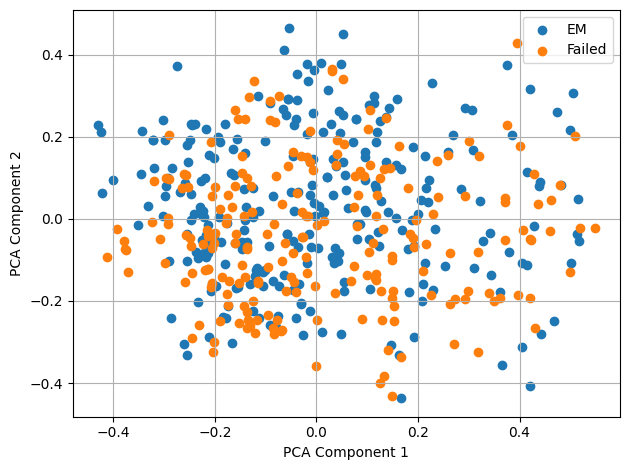

In [53]:


plt.scatter(em_points[:, 0], em_points[:, 1], label=f"EM")
plt.scatter(failed_points[:, 0], failed_points[:, 1], label=f"Failed")
#for i, question in enumerate(questions):
#    plt.annotate(f"{i}", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:

# 8. Vizualizáció
plt.figure(figsize=(10, 6))

cluster_points = reduced_embeddings[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")
for i, question in enumerate(questions):
    plt.annotate(f"{i}", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title(f"Question Clustering (k={optimal_clusters})")
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


IndentationError: unexpected indent (161756407.py, line 5)

In [ ]:
res = pd.read_csv('res/Ollama_24_gwen3_4b_nothinking_code_values_v11_m1.csv')

In [55]:
res

,Unnamed: 0,qid,question,derivation,pred,pred_scale,answer,scale,abs,inv,good,parenth,em
0,0,b2786c1a-37de-4120-b03c-32bf5c81f157,What was the change in the amount for Applianc...,680-774,-94.00,million,-94.00,million,False,False,True,False,True
1,1,fe11f001-3bfe-4089-8108-412676f0a780,What was the percentage change in the amount f...,(680-774)/774,-12.14,million,-12.14,percent,False,False,True,False,False
2,2,5103aed0-b4e8-4fae-bf78-e2c9f4ba84cf,What is the difference between the domestic an...,4.00 - 1.90,2.10,percent,2.10,percent,True,False,True,False,True
3,3,4dc8be43-d8d9-4b08-9ffd-9c19012361ce,What is the year on year percentage change in ...,(4.00 - 3.75)/3.75,6.67,percent,6.67,percent,False,False,True,False,True
4,4,6c44a1a8-0785-43a0-90ab-7e21df2c57d9,What is the year on year percentage change in ...,(3.40 - 3.70)/3.70,-8.11,percent,-8.11,percent,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,489,c8ed0bf6-60c5-41e2-97e3-5ece54a1349b,What is the change in total personnel expenses...,"227,727 - 188,503",39224.00,NaN,39224.00,NaN,False,False,True,False,True
490,490,4cdc8b2e-e3ea-4c36-bbda-7c409a84cc78,What is the percentage change in total personn...,"(227,727 - 188,503 )/188,503",20.81,percent,20.81,percent,False,False,True,False,True
491,491,ec696158-f93d-4608-903d-a6b9c4e7bfd5,What is the increase / (decrease) in the telec...,86.8 - 87.0,-0.20,million,-0.20,million,False,False,True,False,True
492,492,27911d6f-dfe5-487b-bc56-7e5cf16a32e0,What is the average telecommunications install...,(33.2 + 41.5) / 2,37.35,million,37.35,million,False,False,True,False,True
